# Libraries

In [1]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pixel_expand
from frameExtraction import FrameExtraction
from heatmapGeneration import HeatmapGeneration
from masks import Mask
from skimage.filters import gaussian

# Paths

In [2]:
videos_csv = '../EchoNet-Dynamic/VolumeTracings.csv'
images_csv = '../EchoNet-Dynamic/images_info.csv'
images_path = '../EchoNet-Dynamic/images/'
videos_path = '../EchoNet-Dynamic/videos/'
masks_path = '../EchoNet-Dynamic/masked/'

# Save Frames

In [3]:
video_info = pd.read_csv(videos_csv)
video_info.head()

,FileName,X1,Y1,X2,Y2,Frame
0,0X100009310A3BD7FC.avi,51.260417,15.348958,64.932292,69.125000,46
1,0X100009310A3BD7FC.avi,50.037611,17.167841,53.367222,16.321330,46
2,0X100009310A3BD7FC.avi,49.157378,20.407629,57.090549,18.390722,46
3,0X100009310A3BD7FC.avi,48.538173,23.581055,59.997339,20.667707,46
4,0X100009310A3BD7FC.avi,47.918968,26.754480,62.904129,22.944693,46


The FrameExtraction class simply extracts specific frames based on 'VolumeTracings.cvs' and save a .csv with all the landmarks or an specific number of them, it depends of 'num_landmarks' param.

In [4]:
Extraction = FrameExtraction(video_info=video_info)
Extraction.save_images(num_landmarks=5)

¡Straction Done!
Path images:  ../EchoNet-Dynamic/images/
Path df:  ../EchoNet-Dynamic/images_info.csv


In [5]:
frame_info = pd.read_csv(images_csv)
frame_info

,File,X,Y
0,0X7C076CFBDD1CB990_40.jpeg,58,16
1,0X7C076CFBDD1CB990_40.jpeg,85,75
2,0X7C076CFBDD1CB990_40.jpeg,52,49
3,0X7C076CFBDD1CB990_40.jpeg,71,78
4,0X7C076CFBDD1CB990_40.jpeg,79,43
5,0X7C076CFBDD1CB990_56.jpeg,61,18
6,0X7C076CFBDD1CB990_56.jpeg,80,64
7,0X7C076CFBDD1CB990_56.jpeg,57,42
8,0X7C076CFBDD1CB990_56.jpeg,67,67
9,0X7C076CFBDD1CB990_56.jpeg,74,40


# Get Masks

In [6]:
files = os.listdir(images_path)

mask = Mask(
    file_info=frame_info,
    amount_of_frames=2,
    images_files_array=files,
    videos_path=images_path,
)

#mask.generate_masks(action="show")
mask.generate_masks(action="save")

IMAGE SAVING DONE!


# Heatmap Generation

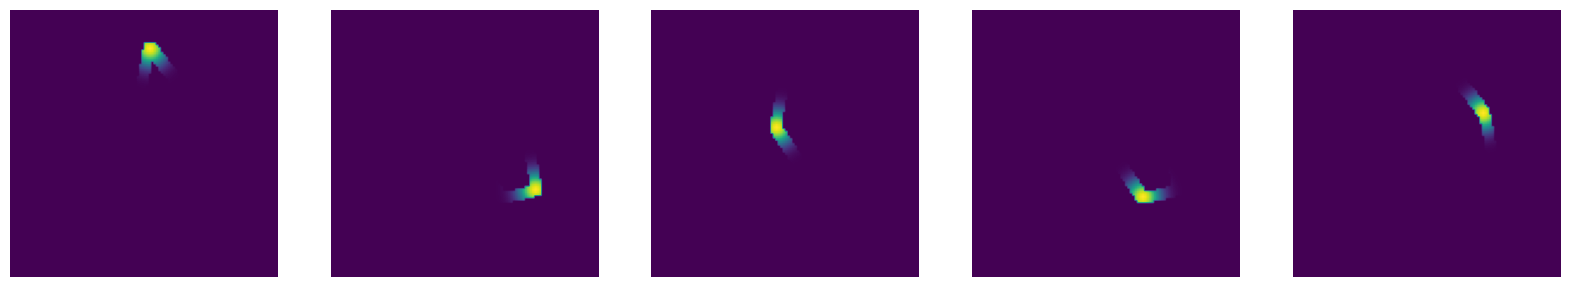

In [7]:
heatmap = HeatmapGeneration(frame_info=frame_info)
heatmap.heatmap(distribution='Gaussian')